# 人脸识别分类

In [25]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_pairs, fetch_lfw_people


## 导入数据

In [ ]:
data = fetch_lfw_people(
    resize = 1,
    min_faces_per_person = 70 
)
data

{'data': array([[0.99477124, 0.99477124, 0.9986928 , ..., 0.38169935, 0.38039216,
         0.38039216],
        [0.16470589, 0.13333334, 0.12418301, ..., 0.47712418, 0.5803922 ,
         0.7267974 ],
        [0.36862746, 0.28235295, 0.2901961 , ..., 0.7163399 , 0.7176471 ,
         0.71503276],
        ...,
        [0.351634  , 0.35816994, 0.35555556, ..., 0.19869281, 0.16732027,
         0.14640523],
        [0.19869281, 0.20130719, 0.19084968, ..., 0.6627452 , 0.62222224,
         0.4771242 ],
        [0.12287582, 0.13071896, 0.10457516, ..., 0.18692811, 0.24705882,
         0.3882353 ]], dtype=float32),
 'images': array([[[0.99477124, 0.99477124, 0.9986928 , ..., 0.21830066,
          0.20130719, 0.20653595],
         [0.99607843, 0.99607843, 0.99477124, ..., 0.22222222,
          0.20261438, 0.20653595],
         [0.9986928 , 0.9973857 , 0.99346405, ..., 0.2248366 ,
          0.20522876, 0.20261438],
         ...,
         [0.3137255 , 0.29542485, 0.2509804 , ..., 0.39477125,
     

## 获取数据

In [ ]:
X = data.data
y = data.target

names = data.target_names
faces = data.images

display(X.shape, y.shape, faces.shape)

(1288, 11750)

(1288,)

(1288, 125, 94)

## 查看图片

[]

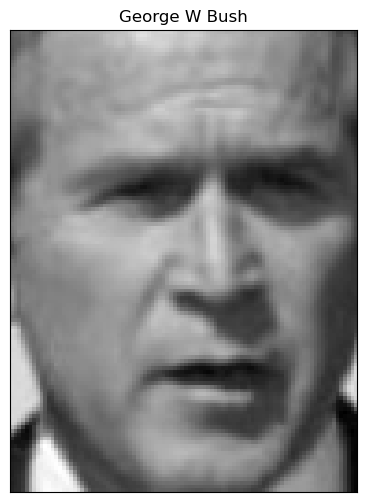

In [16]:
index = np.random.randint(0, 1288, 1)[0]
random_img = faces[index]
random_img_tg = names[y[index]]  

fig, ax = plt.subplots()
ax.imshow(
    random_img,
    cmap = 'gray'
)
ax.set_title(random_img_tg)
ax.set_xticks([])
ax.set_yticks([])

## 特征处理(降维)

In [17]:
pca = PCA(n_components = 0.95)

x_pca = pca.fit_transform(X)

display(x_pca.shape)

(1288, 216)

## 模型训练

In [24]:
#数据拆分
x_pca_train,x_pca_test,y_train,y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)

svc = SVC(kernel='rbf', C=10)
svc.fit(x_pca_train, y_train)

#评估
y_pred = svc.predict(x_pca_test)
display('accuracy score', accuracy_score(y_pred = y_pred, y_true = y_test))

'accuracy score'

0.7984496124031008

## 网格搜索 

In [26]:
param = {
    'kernel':['linear', 'poly', 'rbf'],
    'C': np.arange(0.001, 1000, 10), 
    'tol': [0.01, 0.001, 0.0001]
}

gc = GridSearchCV(
    svc,
    param_grid = param,
    cv = 10
)
gc.fit(x_pca_train, y_train)

#评估
y_gcpred = gc.predict(x_pca_test)
display('accuracy score', accuracy_score(y_pred = y_gcpred, y_true = y_test))
display('best_params', gc.best_params_)

'accuracy score'

0.7984496124031008

'best_params'

{'C': 10.001, 'kernel': 'linear', 'tol': 0.01}

## 优化后建模

In [34]:
#数据拆分
x_pca_train,x_pca_test,y_train,y_test = train_test_split(x_pca, y, test_size=0.2)

svc = SVC(kernel = 'linear', C = 10.001, tol = 0.01)
svc.fit(x_pca_train, y_train)

#评估
y_pred = svc.predict(x_pca_test)
display('accuracy score', accuracy_score(y_pred = y_pred, y_true = y_test))

'accuracy score'

0.8565891472868217

## 可视化 

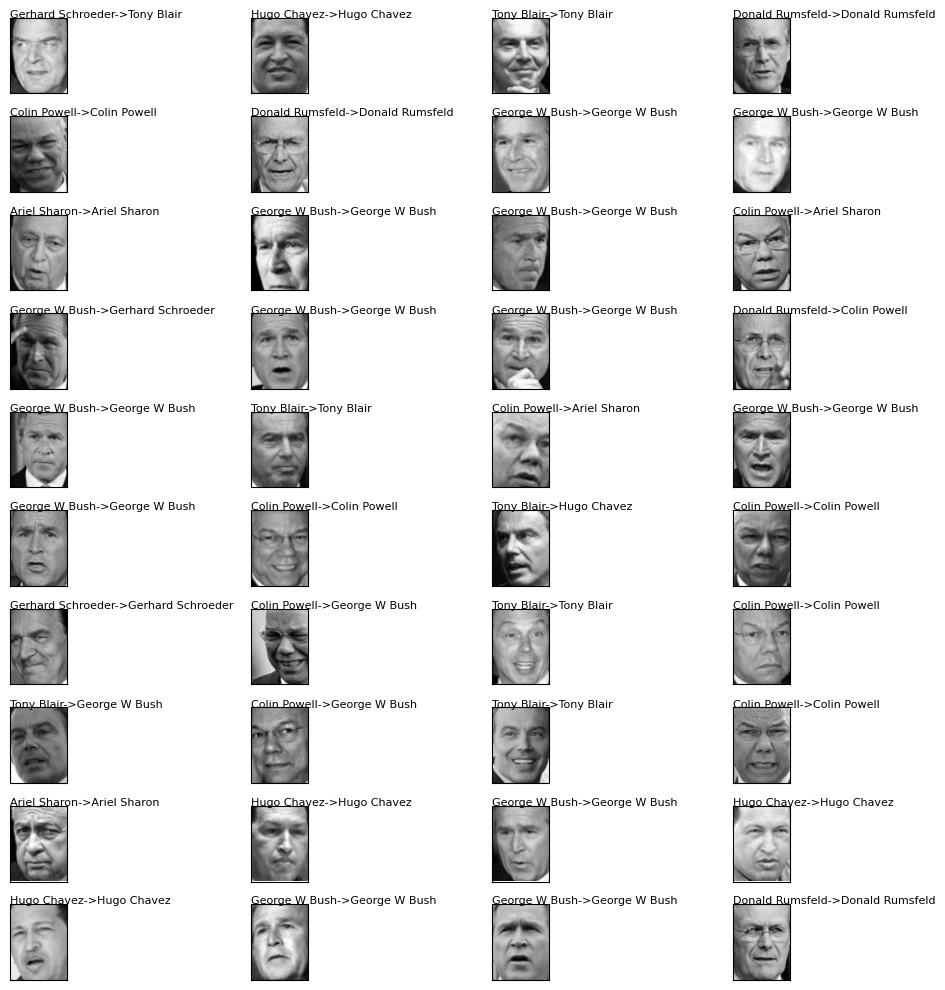

In [57]:
#数据拆分
x_pca_train,x_pca_test,y_train,y_test,faces_train,faces_test = train_test_split(x_pca, y, faces, test_size=0.2)

svc = SVC(kernel = 'linear', C = 10.001, tol = 0.01)
svc.fit(x_pca_train, y_train)

#预测
y_pred = svc.predict(x_pca_test)

fig = plt.figure(figsize = (10, 10))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(faces_test[i],
               cmap='gray')
    plt.text(
        x = 0,
        y = 0,
        fontsize = 8,
        s = names[y_test[i]] + '->' + names[y_pred[i]])
    
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()